Machine Learning Model of Adidas Sales with ARIMA and Seasonal-ARIMA Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
df=pd.read_csv('GOOG.csv')

In [18]:
#Considering two columns to analysing sales data

df1 = df[["date", "volume"]]

In [19]:
df1.head()

,date,volume
0,2016-06-14 00:00:00+00:00,1306065
1,2016-06-15 00:00:00+00:00,1214517
2,2016-06-16 00:00:00+00:00,1982471
3,2016-06-17 00:00:00+00:00,3402357
4,2016-06-20 00:00:00+00:00,2082538


In [20]:
df1.tail()

,date,volume
1253,2021-06-07 00:00:00+00:00,1192453
1254,2021-06-08 00:00:00+00:00,1253253
1255,2021-06-09 00:00:00+00:00,1006337
1256,2021-06-10 00:00:00+00:00,1561733
1257,2021-06-11 00:00:00+00:00,1262309


In [21]:
df1.describe()

,volume
count,1.258000e+03
mean,1.601590e+06
std,6.960172e+05
min,3.467530e+05
25%,1.173522e+06
50%,1.412588e+06
75%,1.812156e+06
max,6.207027e+06


Data Visualization

<Axes: >

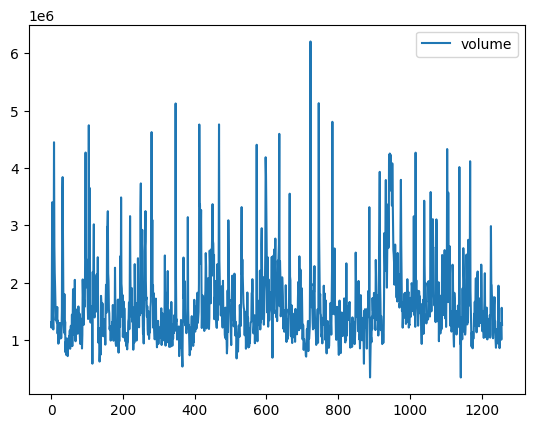

In [22]:
df1.plot()

In [23]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [24]:
test_result=adfuller(df1['volume'])

In [25]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("STRONG evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("WEAK evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
adfuller_test(df1['volume'])

ADF Test Statistic : -12.959660781301368
p-value : 3.24533641176566e-24
#Lags Used : 2
Number of Observations Used : 1255
STRONG evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Differencing


In [27]:
df1['First Difference'] = df1['volume'] - df1['volume'].shift(12)

<ipython-input-27-01a93692beab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['First Difference'] = df1['volume'] - df1['volume'].shift(12)


In [28]:
df1['volume'].shift(12)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253     967544.0
1254    1191593.0
1255    1141632.0
1256    1062189.0
1257     941928.0
Name: volume, Length: 1258, dtype: float64

In [29]:
df1.head(15)

,date,volume,First Difference
0,2016-06-14 00:00:00+00:00,1306065,NaN
1,2016-06-15 00:00:00+00:00,1214517,NaN
2,2016-06-16 00:00:00+00:00,1982471,NaN
3,2016-06-17 00:00:00+00:00,3402357,NaN
4,2016-06-20 00:00:00+00:00,2082538,NaN
5,2016-06-21 00:00:00+00:00,1465634,NaN
6,2016-06-22 00:00:00+00:00,1184318,NaN
7,2016-06-23 00:00:00+00:00,2171415,NaN
8,2016-06-24 00:00:00+00:00,4449022,NaN
9,2016-06-27 00:00:00+00:00,2641085,NaN


In [30]:
# Again test dickey fuller test

adfuller_test(df1['First Difference'].dropna())

ADF Test Statistic : -12.42566199430023
p-value : 4.044433568967663e-23
#Lags Used : 23
Number of Observations Used : 1222
STRONG evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

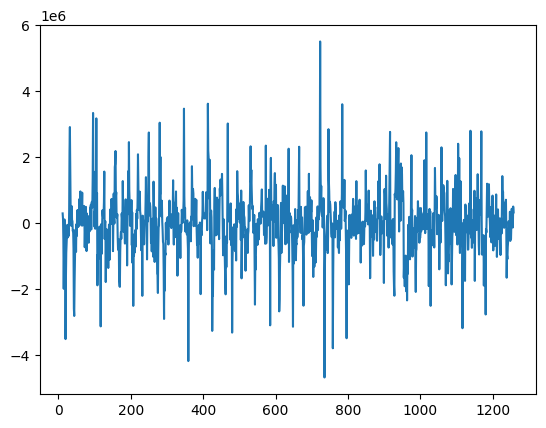

In [31]:
df1['First Difference'].plot()

Auto-Regressive Model


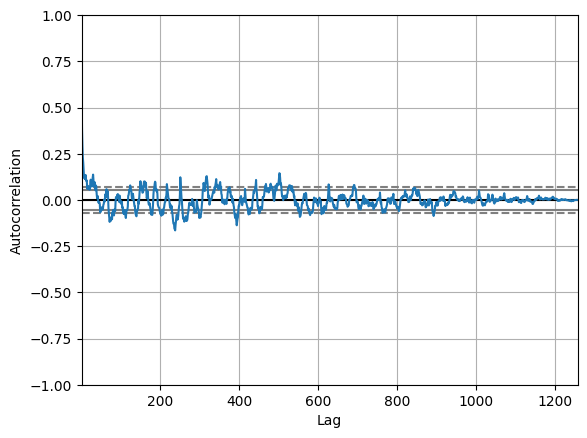

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['volume'])
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


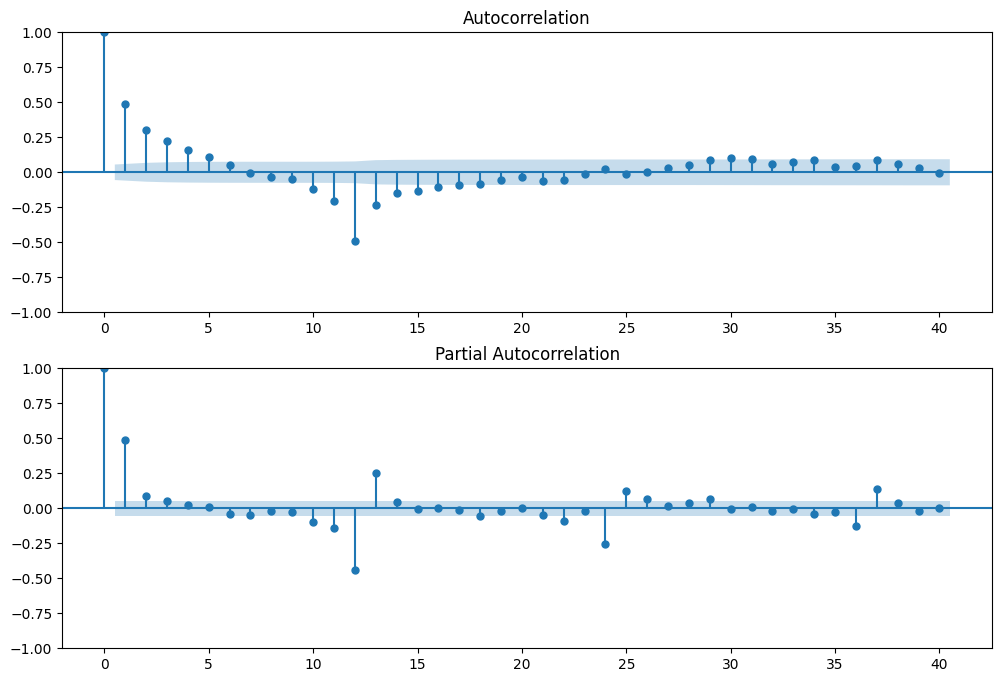

In [34]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['First Difference'].iloc[12:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['First Difference'].iloc[12:],lags=40,ax=ax2)

In [35]:
#For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
model=SARIMAX(df1['volume'],order=(1,1,1))
model_fit=model.fit()

In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                 1258
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -18467.246
Date:                Mon, 26 Jun 2023   AIC                          36940.492
Time:                        17:33:35   BIC                          36955.902
Sample:                             0   HQIC                         36946.284
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4752      0.022     21.559      0.000       0.432       0.518
ma.L1         -0.9549      0.010    -94.021      0.000      -0.975      -0.935
sigma2      3.668e+11    2.7e-14   1.36e+25      0.000    3.67e+11    3.67e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):              5254.57
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             2.20
Prob(H) (two-sided):                  0.22   Kurtosis:                        12.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+39. Standard errors may be unstable.
"""

<ipython-input-38-b886e5fea83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=model_fit.predict(start=1000,end=1300,dynamic=True)


<Axes: >

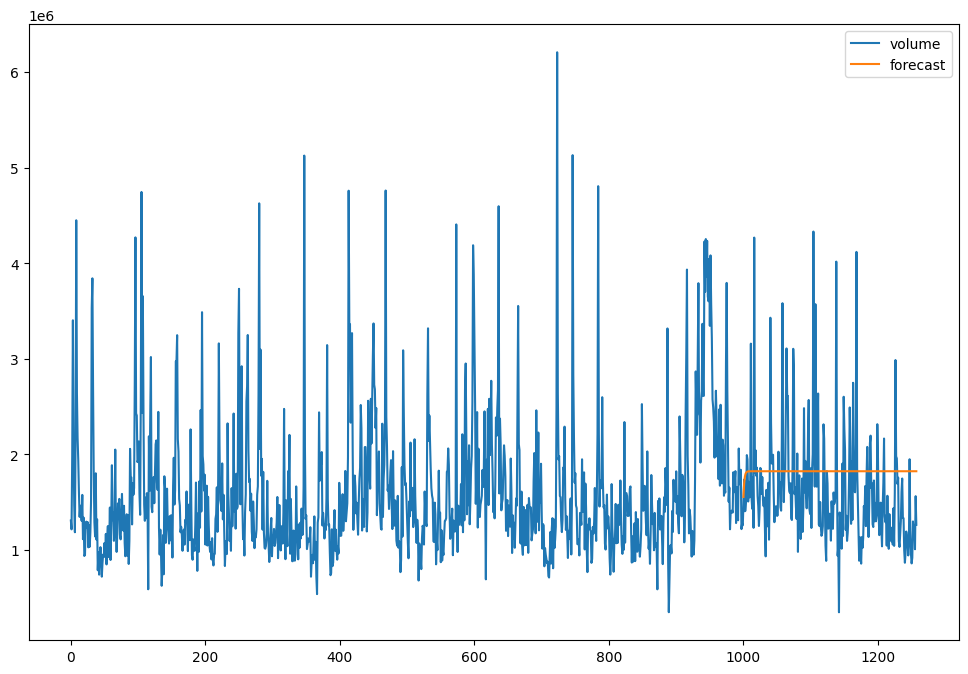

In [38]:
df1['forecast']=model_fit.predict(start=1000,end=1300,dynamic=True)
df1[['volume','forecast']].plot(figsize=(12,8))

In [39]:
model=sm.tsa.statespace.SARIMAX(df['volume'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<ipython-input-40-8476fef91914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=results.predict(start=1000,end=1300,dynamic=True)


<Axes: >

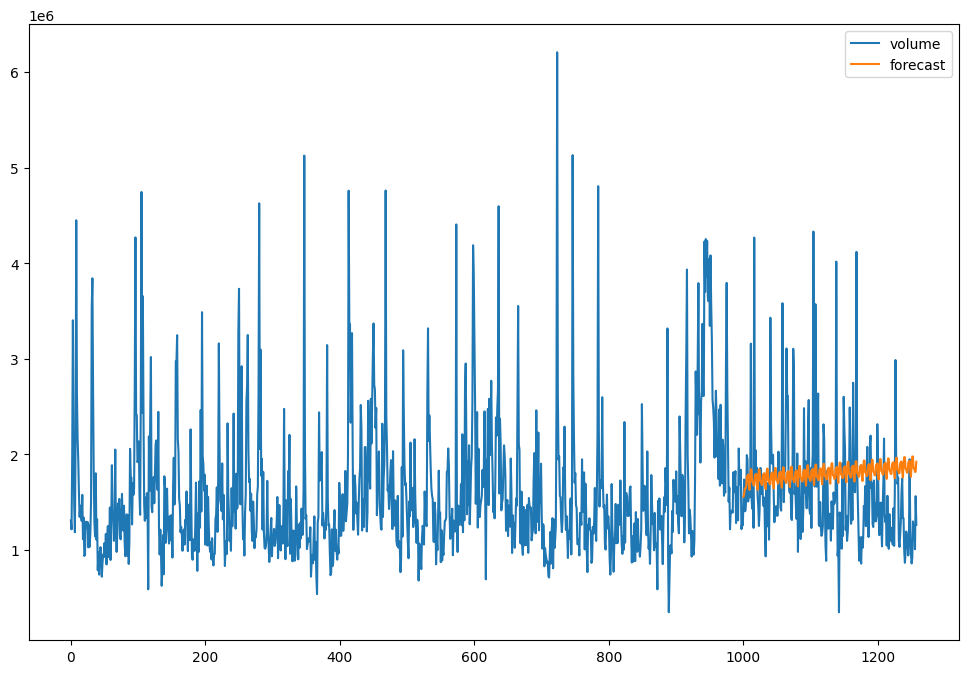

In [40]:
df1['forecast']=results.predict(start=1000,end=1300,dynamic=True)
df1[['volume','forecast']].plot(figsize=(12,8))

In [41]:
last_date = df1.index[-1]
future_dates = pd.date_range(start=last_date, periods=100, freq='M')

In [42]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [43]:
future_datest_df1.tail()

,date,volume,First Difference,forecast
1977-12-31 00:00:00.000001257,NaN,NaN,NaN,NaN
1978-01-31 00:00:00.000001257,NaN,NaN,NaN,NaN
1978-02-28 00:00:00.000001257,NaN,NaN,NaN,NaN
1978-03-31 00:00:00.000001257,NaN,NaN,NaN,NaN
1978-04-30 00:00:00.000001257,NaN,NaN,NaN,NaN


In [44]:
future_df1=pd.concat([df1,future_datest_df1])

<Axes: >

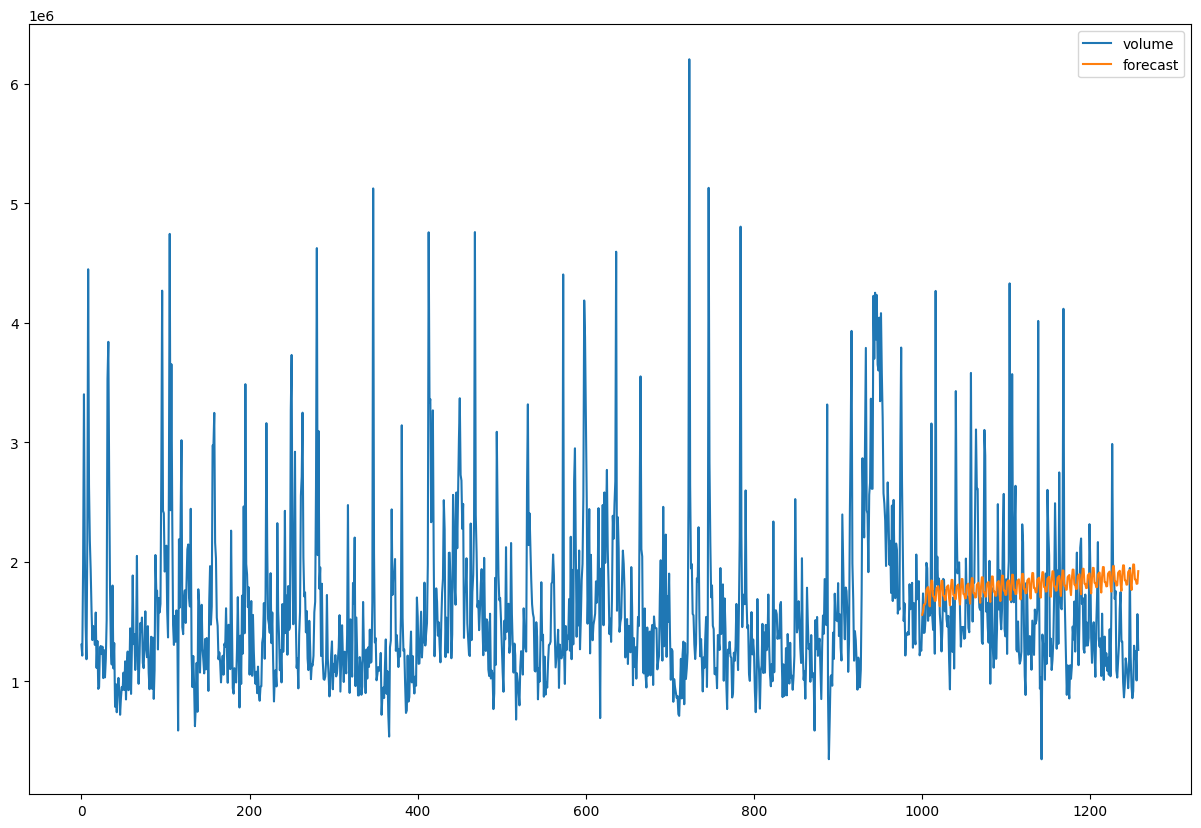

In [45]:
future_df1['forecast'] = results.predict(start = 1000, end = 1300, dynamic= True)
future_df1[['volume', 'forecast']].plot(figsize=(15,10))

In [50]:
# Calculate the Mean Absolute Percentage Error (MAPE)
n = len(df1)
mape = (1 / n) * np.sum(np.abs((df1['volume'] - df1['forecast']) / df1['volume'])) * 100

print("MAPE:", mape)


MAPE: 7.107067215717741


In [51]:
print("Accuracy:", 100-mape)

Accuracy: 92.89293278428227
